# Import Libraries

In [3]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_squared_error
import sklearn as sklearn


In [4]:
df = pd.read_csv("./dengue_features_train.csv")

In [31]:
df_lables = pd.read_csv('./dengue_labels_train.csv')
test = pd.read_csv('./dengue_features_test.csv')


# Exploratory Data Analysis

In [6]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
df_lables.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [8]:
df.count()

city                                     1456
year                                     1456
weekofyear                               1456
week_start_date                          1456
ndvi_ne                                  1262
ndvi_nw                                  1404
ndvi_se                                  1434
ndvi_sw                                  1434
precipitation_amt_mm                     1443
reanalysis_air_temp_k                    1446
reanalysis_avg_temp_k                    1446
reanalysis_dew_point_temp_k              1446
reanalysis_max_air_temp_k                1446
reanalysis_min_air_temp_k                1446
reanalysis_precip_amt_kg_per_m2          1446
reanalysis_relative_humidity_percent     1446
reanalysis_sat_precip_amt_mm             1443
reanalysis_specific_humidity_g_per_kg    1446
reanalysis_tdtr_k                        1446
station_avg_temp_c                       1413
station_diur_temp_rng_c                  1413
station_max_temp_c                

In [9]:
df_lables.count()

city           1456
year           1456
weekofyear     1456
total_cases    1456
dtype: int64

In [10]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [11]:
df_lables.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [12]:
Duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", Duplicate_rows_df.shape)

number of duplicate rows:  (0, 24)


In [13]:
Duplicate_rows_df = df_lables[df_lables.duplicated()]
print("number of duplicate rows: ", Duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [14]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [15]:
df_lables.isnull().sum()

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

In [16]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [17]:
df_lables.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [19]:
df_lables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [20]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [21]:
#Check Null Values
df[df.isnull().any(axis=1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,...,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,...,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,...,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,iq,2009,23,2009-06-04,0.114000,0.092443,0.097471,0.126286,42.22,296.125714,...,53.91,95.507143,42.22,16.757143,6.071429,28.100000,11.800000,34.0,22.2,NaN
1409,iq,2009,32,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.79,297.370000,...,34.40,87.811429,9.79,16.337143,11.757143,27.975000,12.100000,35.4,20.5,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,299.264286,...,8.50,78.271429,27.04,16.127143,11.100000,28.600000,12.300000,35.1,21.8,NaN


In [22]:
df.corr()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.071649,0.223361,0.144345,0.234234,0.277759,0.205302,-0.140016,0.085043,0.132273,...,0.132625,0.336349,0.205302,0.161596,0.490542,0.047010,0.373644,0.227320,-0.214482,0.219910
weekofyear,-0.071649,1.000000,0.053548,0.048759,0.121557,0.068701,0.118037,0.425753,0.463677,0.348946,...,0.072955,-0.015191,0.118037,0.350821,0.077933,0.368408,0.023220,0.232098,0.292362,0.066294
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,...,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,...,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,...,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,...,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.205302,0.118037,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,...,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637
reanalysis_air_temp_k,-0.140016,0.425753,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,...,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851
reanalysis_avg_temp_k,0.085043,0.463677,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,...,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052
reanalysis_dew_point_temp_k,0.132273,0.348946,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,...,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335


In [23]:
df.corr().unstack().sort_values().drop_duplicates().head(20)

reanalysis_tdtr_k                     reanalysis_min_air_temp_k   -0.815511
reanalysis_min_air_temp_k             station_diur_temp_rng_c     -0.715676
                                      ndvi_ne                     -0.623116
reanalysis_max_air_temp_k             reanalysis_min_air_temp_k   -0.600850
reanalysis_min_air_temp_k             ndvi_nw                     -0.588806
                                      ndvi_sw                     -0.494284
station_min_temp_c                    reanalysis_tdtr_k           -0.451940
                                      station_diur_temp_rng_c     -0.439345
reanalysis_relative_humidity_percent  reanalysis_min_air_temp_k   -0.410714
ndvi_se                               reanalysis_min_air_temp_k   -0.407931
reanalysis_relative_humidity_percent  reanalysis_air_temp_k       -0.402338
reanalysis_min_air_temp_k             year                        -0.392351
ndvi_ne                               reanalysis_air_temp_k       -0.340976
reanalysis_a

In [24]:
df.corr().unstack().sort_values().drop_duplicates().tail(20)

station_diur_temp_rng_c      ndvi_ne                                  0.658129
ndvi_ne                      ndvi_sw                                  0.669504
reanalysis_tdtr_k            ndvi_ne                                  0.673935
station_max_temp_c           station_diur_temp_rng_c                  0.715217
reanalysis_air_temp_k        station_min_temp_c                       0.719612
station_min_temp_c           reanalysis_min_air_temp_k                0.720701
reanalysis_air_temp_k        reanalysis_min_air_temp_k                0.736765
reanalysis_dew_point_temp_k  station_avg_temp_c                       0.743506
station_avg_temp_c           reanalysis_specific_humidity_g_per_kg    0.747809
                             reanalysis_avg_temp_k                    0.751330
reanalysis_max_air_temp_k    station_max_temp_c                       0.763446
station_avg_temp_c           station_max_temp_c                       0.764576
ndvi_se                      ndvi_sw                

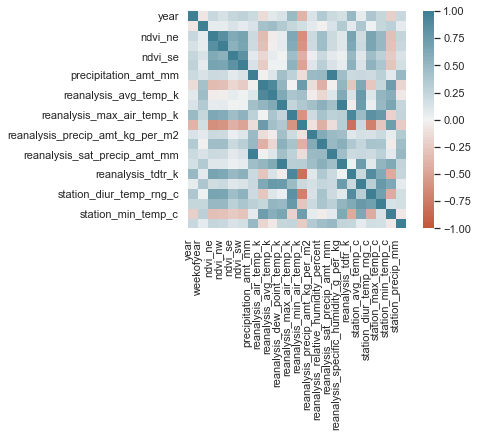

In [25]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<AxesSubplot:>

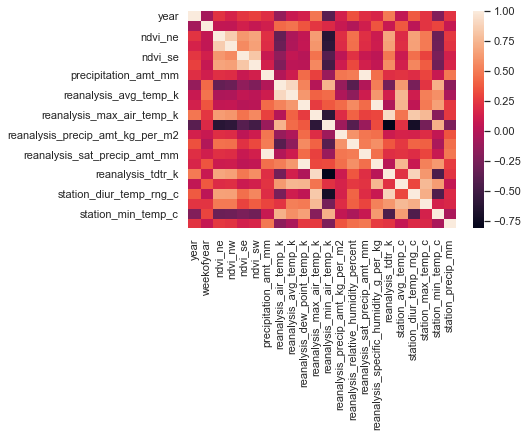

In [26]:
sns.heatmap(df.corr())


# Data Insights
1. There are in Total 1456 Rows nd 24 columns.
2. Max values are null is of ndvi_ne
3. Data type of City is Object and same for week start date
4. Top 5 Correlated metrics are as follows:
    "reanalysis_tdtr_k" and "reanalysis_min_air_temp_k" is -0.815511  ,
    "reanalysis_min_air_temp_k" and  "station_diur_temp_rng_c" is "-0.715676"  ,
    " missing"  and "ndvi_ne" is "-0.623116","reanalysis_max_air_temp_k" and "reanalysis_min_air_temp_k" is "-0.600850",
    "reanalysis_min_air_temp_k" and "ndvi_nw" is "-0.588806"
   

# Data Modelling

In [27]:
final_train = pd.merge(df,df_lables,on=['city','year','weekofyear'])

In [29]:
final_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [30]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

# Model Running



In [32]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

city = test.city

final_train.city = enc.fit_transform(final_train.city.values.reshape(-1,1))
final_train.week_start_date = enc.fit_transform(final_train.week_start_date.values.reshape(-1,1))

test.city = enc.fit_transform(test.city.values.reshape(-1,1))
test.week_start_date = enc.fit_transform(test.week_start_date.values.reshape(-1,1))

In [34]:
#replace columns with mode
for column in final_train.columns:
    final_train[column].fillna(final_train[column].median(), inplace=True)

for column in test.columns:
    test[column].fillna(test[column].median(), inplace=True)

In [35]:
final_train.city = final_train.city.astype(str)
final_train.year = final_train.year.astype(str)
final_train.weekofyear = final_train.weekofyear.astype(str)
final_train['year_week'] = final_train['city'] + "_" + final_train['year'].astype(str) + "-" + final_train['weekofyear'].astype(str)
final_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,year_week
0,1.0,1990,18,0.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.0_1990-18
1,1.0,1990,19,1.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.0_1990-19
2,1.0,1990,20,2.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.0_1990-20
3,1.0,1990,21,3.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.0_1990-21
4,1.0,1990,22,4.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.0_1990-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.0,2010,21,1044.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,0.0_2010-21
1452,0.0,2010,22,1045.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,0.0_2010-22
1453,0.0,2010,23,1046.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0.0_2010-23
1454,0.0,2010,24,1047.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0.0_2010-24


In [37]:

test.city = test.city.astype(str)
test.year = test.year.astype(str)
test.weekofyear = test.weekofyear.astype(str)
test['year_week'] = final_train['city'] + "_" + test['year'].astype(str) + "-" + test['weekofyear'].astype(str)
test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,year_week
0,1.0,2008,18,0.0,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1.0_2008-18
1,1.0,2008,19,1.0,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1.0_2008-19
2,1.0,2008,20,2.0,-0.001500,0.088700,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1.0_2008-20
3,1.0,2008,21,3.0,0.110100,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1.0_2008-21
4,1.0,2008,22,4.0,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1.0_2008-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.0,2013,22,264.0,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,1.0_2013-22
412,0.0,2013,23,265.0,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,1.0_2013-23
413,0.0,2013,24,266.0,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,1.0_2013-24
414,0.0,2013,25,267.0,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,1.0_2013-25


In [38]:
final_train.year_week = enc.fit_transform(final_train.year_week.values.reshape(-1,1))

test.year_week = enc.fit_transform(test.year_week.values.reshape(-1,1))

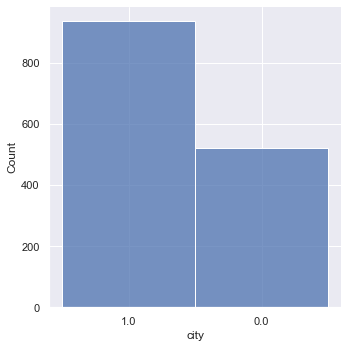

In [39]:
sns.displot(final_train['city'])

In [40]:

from collections import Counter

print(Counter(final_train.city))

Counter({'1.0': 936, '0.0': 520})


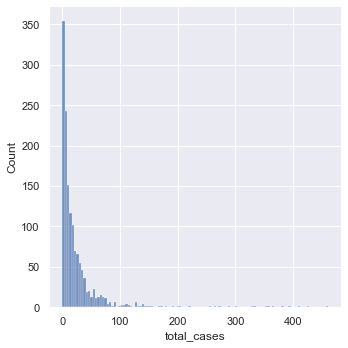

In [42]:
sns.displot(final_train['total_cases'])

In [43]:

y = final_train.total_cases.values

X = final_train.drop(['city', 'year', 'weekofyear', 'week_start_date', 'total_cases'], axis = 1).values
X_test = test.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis = 1).values

In [44]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1, shuffle = True)
X_train.shape, X_val.shape, y_train.shape,y_val.shape, X_test.shape

((1310, 21), (146, 21), (1310,), (146,), (416, 21))

In [45]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

In [46]:
X_val.shape, X_train.shape, X_test.shape

((146, 21), (1310, 21), (416, 21))

In [47]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1)).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9979079140102024


In [48]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.744123267311749
0.9995798661313112


(None, None)

In [49]:
y_pred

array([ 14,  54,  12,   5,  22,  24,   8,   2,  19,  12,  16,   7,   2,
        28,  15,   9,   9,   1,  41,  36,  10,  43,  11,   9,  10,  13,
         9, 111,   2,  14,  14,  19,  46,  22,  17,   5,  17,   9,  60,
         9,   4,  24,  38,  24,  19,  11,   5,  16,  21,  23,  17,  17,
         9,   7,  10,  25,   7,  10,  19,  11,  30,  26,   5,  35,   5,
        12,  14,   2,  14,  32,  28,  20,  12,  71,  54,  12,   6,  11,
         9,  34,  19,  32,   6,  24,  11,  22,   9,  14,  15,  33,  36,
         6,  31,   9,   6,  12,   9,  26,  12,  39,  18,  21,  20,   4,
         7,  80,  11,  32,   6,  12, 284,   8,  14,  24,   7,  10,  11,
        33,  21,  32,  12,  27,  21,  16,   3,  18,  69,  12,   9,  54,
         5,  64,   0,  34,   1,  15,   7,   8,  16,   6,   5,  17,  24,
        45,  40,   6])

In [50]:

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,0,14
1,26,54
2,2,12
3,3,5
4,7,22
...,...,...
141,1,17
142,22,24
143,37,45
144,104,40


In [51]:
final_labels = model.predict(X_test)
final_labels = final_labels.astype(int)
final_labels

array([12, 27, 10, 27, 27, 30, 25, 15, 23, 16, 25, 27, 24, 29, 24, 26, 28,
       26, 42, 30, 22, 35, 20, 25, 29, 20, 27, 24, 26, 28, 29, 28, 34, 24,
        9,  9, 15, 30, 11, 17, 14, 17, 24, 22, 10, 16, 17,  7,  7,  7,  4,
        5, 15,  6, 22, 23, 11, 12, 15, 17, 25, 30, 31, 26, 30, 26, 28, 30,
       29, 35, 43, 22, 25, 30, 32, 47, 40, 23, 24, 22, 23, 28, 18, 39, 35,
       34, 26,  3, 30, 18, 36, 21, 29,  7, 20, 13, 16, 15, 12, 21, 37, 11,
       18, 20, 28, 28, 27, 20, 26, 45, 43, 38, 26, 34, 42, 33, 29, 22, 35,
       47, 50, 46, 47, 48, 40, 35, 37, 29, 43, 40, 47, 31, 21, 28, 34, 32,
       14, 13, 14, 25, 30, 14, 34, 25, 28, 17, 19, 13, 21, 16, 14,  9, 10,
        7, 27, 12, 16, 30, 27,  9, 28, 18, 25, 39, 22, 17, 22, 29, 10, 36,
       18, 33, 19, 37, 31, 20, 25, 22, 22, 28, 27, 24, 27, 20, 20, 24, 35,
       31, 33, 42, 25, 29, 30, 34, 33, 22, 19, 17, 11, 15, 15,  7,  6,  3,
       12, 10, 10, 14,  7, 17, 32, 19, 13, 27, 24, 27, 39, 30, 27, 22, 22,
       27, 26, 22, 25, 29

In [52]:
end = pd.DataFrame({'city': city, 'year': test.year, 'weekofyear': test.weekofyear,'total_cases': final_labels})

In [53]:
end.to_csv('submission.csv', index=False)
print("saved")

saved
